In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docler image: https://github/kaggle/docker-python
# Here are just a select couple I have installed for the purposes of this analysis

import numpy as np # core library for scientific computing
import pandas as pd # provides easy to use data structures and data analysis
import matplotlib.pyplot as plt # 2D plotting library for data visualisation
import seaborn as sns #  provides a high-level interface for drawing attractive statistical graphics

# Importing Data

In [2]:
# Import our csv file

df_orginal = pd.read_csv("C:/Users/mark.keogh/Documents/GitHub/-UCDPA_MarkKeogh/Datasets/disney_plus_titles.csv", delimiter=",", index_col=["show_id"])

In [3]:
# Take a copy of database incase of errors while manipulating

df = df_orginal.copy()

In [4]:
df.shape # shows 1450 rows and 12 columns

(1450, 12)

In [5]:
# Show first 5 rows to get an idea of the data

df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,stream_platform
show_id,,,,,,,,,,,,
s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,Disney
s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,Disney
s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,Disney
s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",Disney
s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,PG-13,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,Disney


In [6]:
# Get column information and type i.e. all columns are an object (string) except release_year (integer)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1450 entries, s1 to s1450
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   type             1450 non-null   object
 1   title            1450 non-null   object
 2   director         977 non-null    object
 3   cast             1260 non-null   object
 4   country          1231 non-null   object
 5   date_added       1447 non-null   object
 6   release_year     1450 non-null   int64 
 7   rating           1450 non-null   object
 8   duration         1450 non-null   object
 9   listed_in        1450 non-null   object
 10  description      1450 non-null   object
 11  stream_platform  1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 147.3+ KB


In [7]:
# Find unique values in each column

df.nunique()

type                  2
title              1450
director            609
cast               1193
country              89
date_added          167
release_year         90
rating                8
duration            158
listed_in           329
description        1448
stream_platform       1
dtype: int64

# CLEANING THE DATA

In [8]:
# Changing the date_added value to be in date sequence

df['date_added'] = df['date_added'].astype('datetime64')


In [9]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,stream_platform
show_id,,,,,,,,,,,,
s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,Disney
s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,Disney
s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,Disney
s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",Disney
s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,2021-11-25,2021,PG-13,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,Disney


In [10]:
# Checking for missing values

df.isnull().sum()

type                 0
title                0
director           473
cast               190
country            219
date_added           3
release_year         0
rating               0
duration             0
listed_in            0
description          0
stream_platform      0
dtype: int64

In [11]:
# Going to drop the director and cast values as they are not needed for now

df.drop(columns={'director', 'cast'})

,type,title,country,date_added,release_year,rating,duration,listed_in,description,stream_platform
show_id,,,,,,,,,,
s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,NaN,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,Disney
s2,Movie,Ernest Saves Christmas,NaN,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,Disney
s3,Movie,Ice Age: A Mammoth Christmas,United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,Disney
s4,Movie,The Queen Family Singalong,NaN,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",Disney
s5,TV Show,The Beatles: Get Back,NaN,2021-11-25,2021,PG-13,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,Disney
...,...,...,...,...,...,...,...,...,...,...
s1446,Movie,X-Men Origins: Wolverine,"United States, United Kingdom",2021-06-04,2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,Disney
s1447,Movie,Night at the Museum: Battle of the Smithsonian,"United States, Canada",2021-04-02,2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,Disney
s1448,Movie,Eddie the Eagle,"United Kingdom, Germany, United States",2020-12-18,2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",Disney


In [12]:
# Can fill in country NaN's with the Unkown

df['country'].fillna('Unknown', inplace=True)

In [13]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,stream_platform
show_id,,,,,,,,,,,,
s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",Unknown,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,Disney
s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",Unknown,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,Disney
s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,Disney
s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",Unknown,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",Disney
s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",Unknown,2021-11-25,2021,PG-13,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,Disney


In [14]:
# Renaming rating Column to make more readable
df.rename(columns={"rating": "Parental_Rating"})

,type,title,director,cast,country,date_added,release_year,Parental_Rating,duration,listed_in,description,stream_platform
show_id,,,,,,,,,,,,
s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",Unknown,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,Disney
s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",Unknown,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,Disney
s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,Disney
s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",Unknown,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",Disney
s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",Unknown,2021-11-25,2021,PG-13,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,Disney
...,...,...,...,...,...,...,...,...,...,...,...,...
s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom",2021-06-04,2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,Disney
s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada",2021-04-02,2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,Disney
s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States",2020-12-18,2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",Disney


In [16]:
# Convertin type column to category datatype
df['type'] = df['type'].astype('category')
df['type'].dtype

CategoricalDtype(categories=['Movie', 'TV Show'], ordered=False)

In [17]:
# Check for duplicates
df.duplicated().sum()

0

In [27]:
# Create a column for MonthAdded and YearAdded
from datetime import datetime as dt
df['MonthAdded'] = df['date_added'].dt.strftime("%B")

In [28]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,stream_platform,MonthAdded
show_id,,,,,,,,,,,,,
s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",Unknown,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,Disney,November
s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",Unknown,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,Disney,November
s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,Disney,November
s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",Unknown,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",Disney,November
s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",Unknown,2021-11-25,2021,PG-13,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,Disney,November


In [29]:
df['YearAdded'] = df['date_added'].apply(lambda x: x.year)

In [30]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,stream_platform,MonthAdded,YearAdded
show_id,,,,,,,,,,,,,,
s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",Unknown,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,Disney,November,2021.0
s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",Unknown,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,Disney,November,2021.0
s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,Disney,November,2021.0
s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",Unknown,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",Disney,November,2021.0
s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",Unknown,2021-11-25,2021,PG-13,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,Disney,November,2021.0


In [32]:
df.drop(columns={'director', 'cast', 'date_added'})

,type,title,country,release_year,rating,duration,listed_in,description,stream_platform,MonthAdded,YearAdded
show_id,,,,,,,,,,,
s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,Unknown,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,Disney,November,2021.0
s2,Movie,Ernest Saves Christmas,Unknown,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,Disney,November,2021.0
s3,Movie,Ice Age: A Mammoth Christmas,United States,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,Disney,November,2021.0
s4,Movie,The Queen Family Singalong,Unknown,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",Disney,November,2021.0
s5,TV Show,The Beatles: Get Back,Unknown,2021,PG-13,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,Disney,November,2021.0
...,...,...,...,...,...,...,...,...,...,...,...
s1446,Movie,X-Men Origins: Wolverine,"United States, United Kingdom",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,Disney,June,2021.0
s1447,Movie,Night at the Museum: Battle of the Smithsonian,"United States, Canada",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,Disney,April,2021.0
s1448,Movie,Eddie the Eagle,"United Kingdom, Germany, United States",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",Disney,December,2020.0


In [33]:
# Create a new Column for Viewer Ages
viewer_ages = {
    'TV-G' : 'Kids', 
    'PG' : 'Older Kids',
    'TV-PG' : 'Older Kids',
    'PG-13' : 'Teens', 
    'TV-14' : 'Teens', 
    'G' : 'Kids', 
    'TV-Y7' : 'Older Kids', 
    'TV-Y' : 'Kids'
}

In [34]:
df['ViewerAge'] = df['rating'].replace(viewer_ages)

In [36]:
df['ViewerAge'].unique()

array(['Kids', 'Older Kids', 'Teens'], dtype=object)

In [37]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,stream_platform,MonthAdded,YearAdded,ViewerAge
show_id,,,,,,,,,,,,,,,
s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",Unknown,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,Disney,November,2021.0,Kids
s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",Unknown,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,Disney,November,2021.0,Older Kids
s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,Disney,November,2021.0,Kids
s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",Unknown,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",Disney,November,2021.0,Older Kids
s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",Unknown,2021-11-25,2021,PG-13,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,Disney,November,2021.0,Teens


In [38]:
df.drop(columns={'director', 'cast', 'date_added'})

,type,title,country,release_year,rating,duration,listed_in,description,stream_platform,MonthAdded,YearAdded,ViewerAge
show_id,,,,,,,,,,,,
s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,Unknown,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,Disney,November,2021.0,Kids
s2,Movie,Ernest Saves Christmas,Unknown,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,Disney,November,2021.0,Older Kids
s3,Movie,Ice Age: A Mammoth Christmas,United States,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,Disney,November,2021.0,Kids
s4,Movie,The Queen Family Singalong,Unknown,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",Disney,November,2021.0,Older Kids
s5,TV Show,The Beatles: Get Back,Unknown,2021,PG-13,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,Disney,November,2021.0,Teens
...,...,...,...,...,...,...,...,...,...,...,...,...
s1446,Movie,X-Men Origins: Wolverine,"United States, United Kingdom",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,Disney,June,2021.0,Teens
s1447,Movie,Night at the Museum: Battle of the Smithsonian,"United States, Canada",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,Disney,April,2021.0,Older Kids
s1448,Movie,Eddie the Eagle,"United Kingdom, Germany, United States",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",Disney,December,2020.0,Teens


In [39]:
# Categorize new column, ViewerAge

df['ViewerAge'] = df['ViewerAge'].astype('category')

In [41]:
# No longer need the rating column
df.drop(columns={'director', 'cast', 'date_added', 'rating'})

,type,title,country,release_year,duration,listed_in,description,stream_platform,MonthAdded,YearAdded,ViewerAge
show_id,,,,,,,,,,,
s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,Unknown,2016,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,Disney,November,2021.0,Kids
s2,Movie,Ernest Saves Christmas,Unknown,1988,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,Disney,November,2021.0,Older Kids
s3,Movie,Ice Age: A Mammoth Christmas,United States,2011,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,Disney,November,2021.0,Kids
s4,Movie,The Queen Family Singalong,Unknown,2021,41 min,Musical,"This is real life, not just fantasy!",Disney,November,2021.0,Older Kids
s5,TV Show,The Beatles: Get Back,Unknown,2021,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,Disney,November,2021.0,Teens
...,...,...,...,...,...,...,...,...,...,...,...
s1446,Movie,X-Men Origins: Wolverine,"United States, United Kingdom",2009,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,Disney,June,2021.0,Teens
s1447,Movie,Night at the Museum: Battle of the Smithsonian,"United States, Canada",2009,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,Disney,April,2021.0,Older Kids
s1448,Movie,Eddie the Eagle,"United Kingdom, Germany, United States",2016,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",Disney,December,2020.0,Teens


In [48]:
# More than one country in Country Col, keeping first only, assuming this is the main Country

df['country'] = df['country'].apply(lambda x : x.split(',')[0])

In [49]:
# Split into two DataFrames, TV Shows and Movies

Movies_df = df[df['type']=='Movie']

In [43]:
Movies_df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,stream_platform,MonthAdded,YearAdded,ViewerAge
show_id,,,,,,,,,,,,,,,
s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",Unknown,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,Disney,November,2021.0,Kids
s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",Unknown,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,Disney,November,2021.0,Older Kids
s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,Disney,November,2021.0,Kids
s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",Unknown,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",Disney,November,2021.0,Older Kids
s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...,Disney,November,2021.0,Teens


In [50]:
Movies_df.drop(columns={'director', 'cast', 'date_added', 'rating'})

,type,title,country,release_year,duration,listed_in,description,stream_platform,MonthAdded,YearAdded,ViewerAge
show_id,,,,,,,,,,,
s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,Unknown,2016,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,Disney,November,2021.0,Kids
s2,Movie,Ernest Saves Christmas,Unknown,1988,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,Disney,November,2021.0,Older Kids
s3,Movie,Ice Age: A Mammoth Christmas,United States,2011,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,Disney,November,2021.0,Kids
s4,Movie,The Queen Family Singalong,Unknown,2021,41 min,Musical,"This is real life, not just fantasy!",Disney,November,2021.0,Older Kids
s6,Movie,Becoming Cousteau,United States,2021,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...,Disney,November,2021.0,Teens
...,...,...,...,...,...,...,...,...,...,...,...
s1446,Movie,X-Men Origins: Wolverine,United States,2009,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,Disney,June,2021.0,Teens
s1447,Movie,Night at the Museum: Battle of the Smithsonian,United States,2009,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,Disney,April,2021.0,Older Kids
s1448,Movie,Eddie the Eagle,United Kingdom,2016,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",Disney,December,2020.0,Teens


In [51]:
TVShows_df = df[df['type']=='TV Show']

In [52]:
TVShows_df.drop(columns={'director', 'cast', 'date_added', 'rating'})

,type,title,country,release_year,duration,listed_in,description,stream_platform,MonthAdded,YearAdded,ViewerAge
show_id,,,,,,,,,,,
s5,TV Show,The Beatles: Get Back,Unknown,2021,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,Disney,November,2021.0,Teens
s7,TV Show,Hawkeye,Unknown,2021,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...,Disney,November,2021.0,Teens
s8,TV Show,Port Protection Alaska,United States,2015,2 Seasons,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...,Disney,November,2021.0,Teens
s9,TV Show,Secrets of the Zoo: Tampa,United States,2019,2 Seasons,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...,Disney,November,2021.0,Older Kids
s14,TV Show,"Dr. Oakley, Yukon Vet",United States,2013,10 Seasons,"Action-Adventure, Animals & Nature, Docuseries","Meet Dr. Michelle Oakley, vet to pretty much e...",Disney,November,2021.0,Older Kids
...,...,...,...,...,...,...,...,...,...,...,...
s1418,TV Show,X-Men: Evolution,United States,2000,4 Seasons,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...,Disney,November,2019.0,Older Kids
s1435,TV Show,Smart Guy,United States,1996,3 Seasons,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...,Disney,October,2019.0,Kids
s1440,TV Show,Disney Kirby Buckets,United States,2014,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.,Disney,NaN,NaN,Older Kids


# Analysis

In [53]:
# By type first

df['type'].shape[0]

1450

In [55]:
df['type'].value_counts()

Movie      1052
TV Show     398
Name: type, dtype: int64

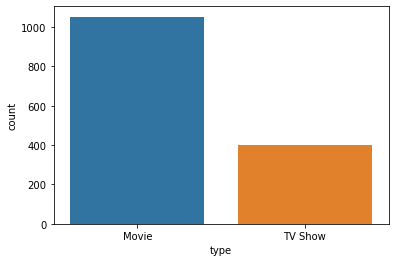

In [56]:
sns.countplot(x=df['type'])
plt.show()

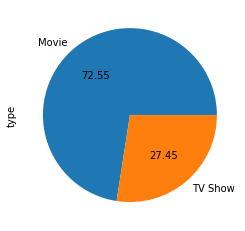

In [57]:
df['type'].value_counts().plot(kind='pie', autopct='%.2f')
plt.show()

In [ ]:
# Can see from the pie chart, 73% of the content is Movies and 27% is Tv Shows

In [59]:
# breakdown of the Viewer Age recommendation

df['ViewerAge'].count()

1450

In [61]:
df['ViewerAge'].value_counts()

Older Kids    681
Kids          621
Teens         148
Name: ViewerAge, dtype: int64

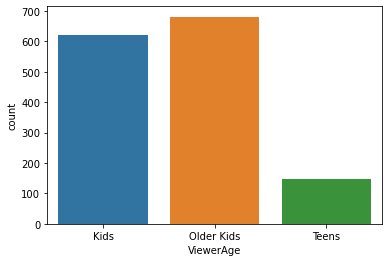

In [64]:
sns.countplot(x=df['ViewerAge'])
plt.show()

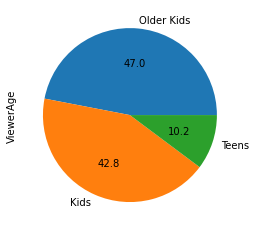

In [63]:
df['ViewerAge'].value_counts().plot(kind='pie', autopct='%.1f')
plt.show()

In [ ]:
# Can see 47% of content is directed to Older Kids, 43% to Kids, and 10% to Teenagers

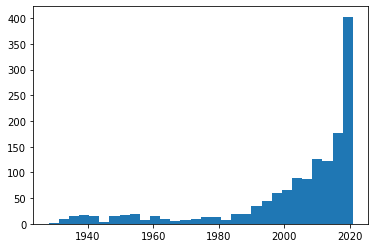

In [65]:
 # Now lets look at the Release Year stats
    
plt.hist(df['release_year'], bins=30)
plt.show()

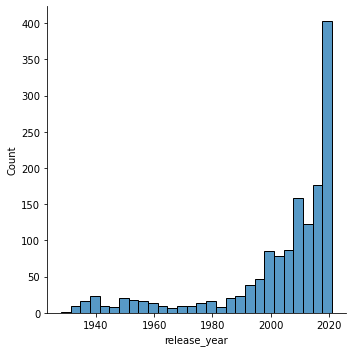

In [67]:
sns.displot(df['release_year'])
plt.show()

C:\Users\mark.keogh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


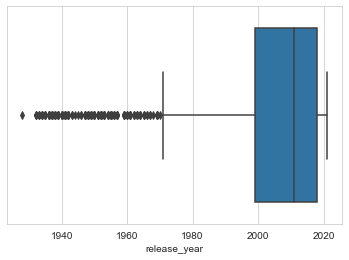

In [100]:
sns.set_style("whitegrid")
sns.boxplot(df['release_year'])
plt.show()

In [70]:
df['release_year'].describe()

count    1450.000000
mean     2003.091724
std        21.860162
min      1928.000000
25%      1999.000000
50%      2011.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

<AxesSubplot:>

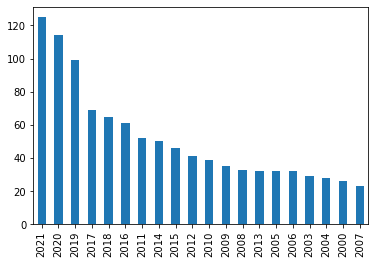

In [71]:
# top 20 release year in which movies released
df['release_year'].value_counts().head(20).plot(kind='bar')

<AxesSubplot:>

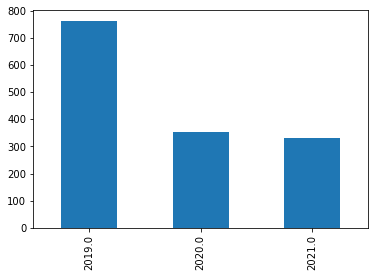

In [77]:
# Looking at Year Added to Streaming Service

df['YearAdded'].value_counts().plot(kind='bar')

<AxesSubplot:>

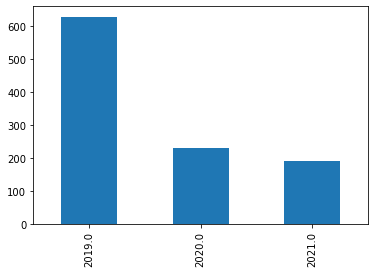

In [80]:
# Movies and Year Added
Movies_df['YearAdded'].value_counts().plot(kind='bar')

<AxesSubplot:>

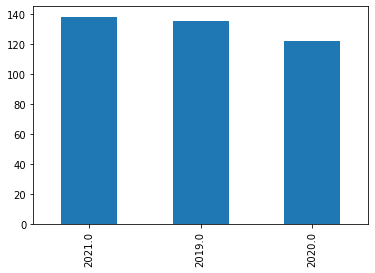

In [81]:
# Tv Shows and Year Added
TVShows_df['YearAdded'].value_counts().plot(kind='bar')

In [ ]:
# Disney Plus only became active in 2019. Most movies added in 2019

<AxesSubplot:xlabel='release_year', ylabel='country'>

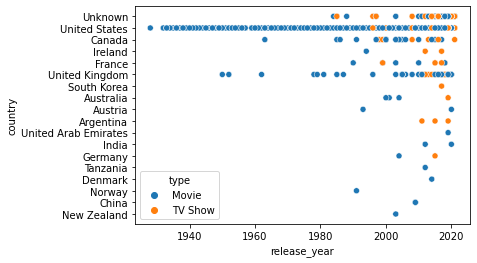

In [79]:
# Lets look at the data with a different type of chart

sns.scatterplot(x=df['release_year'], y=df['country'], hue=df['type'])

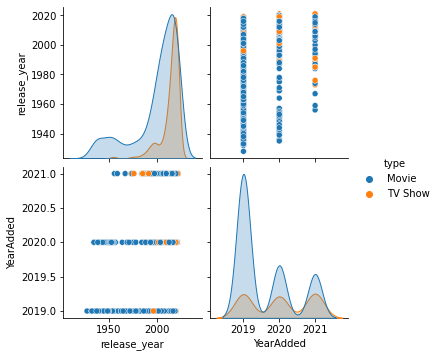

In [82]:
sns.pairplot(df, hue='type')

In [96]:
df = df.reset_index()

In [97]:
# Country Count
Country_new = df.groupby('release_year')['show_id'].count().reset_index()
Country_new.head()

,release_year,show_id
0,1928,1
1,1932,3
2,1933,3
3,1934,4
4,1935,4


<AxesSubplot:xlabel='release_year', ylabel='show_id'>

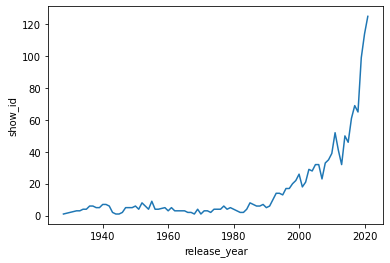

In [98]:
sns.lineplot(x=Country_new['release_year'],y=Country_new['show_id'])

<AxesSubplot:xlabel='release_year', ylabel='show_id'>

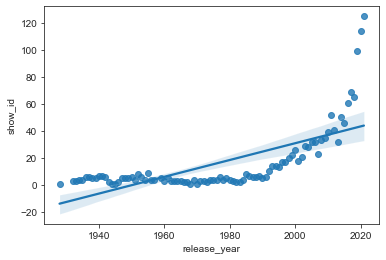

In [116]:
sns.regplot(x=Country_new['release_year'],y=Country_new['show_id'])

<AxesSubplot:xlabel='release_year', ylabel='show_id'>

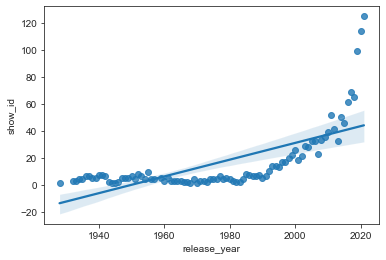

In [115]:
sns.lineplot(x=Country_new['release_year'],y=Country_new['show_id'])